In [8]:
#Q1
#link：https://chatgpt.com/share/66f6fe30-29e8-8009-99ba-ea2ba31b8554
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load penguins dataset
df = sns.load_dataset("penguins")

# Remove missing data if any
df = df.dropna(subset=['flipper_length_mm', 'species'])
# Define a function to compute stats for each species
def compute_stats(data, column):
    stats = {}
    stats['mean'] = data[column].mean()
    stats['median'] = data[column].median()
    stats['min'] = data[column].min()
    stats['max'] = data[column].max()
    stats['iqr'] = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    stats['std'] = data[column].std()
    stats['lower_2std'] = stats['mean'] - 2 * stats['std']
    stats['upper_2std'] = stats['mean'] + 2 * stats['std']
    return stats

species_stats = {}
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    species_stats[species] = compute_stats(species_data, 'flipper_length_mm')
fig = go.Figure()

# Create histograms and annotations for each species
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    stats = species_stats[species]
    
    # Add histogram
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'],
        name=f'{species} Histogram',
        opacity=0.6
    ))

    # Add vertical lines for mean and median
    fig.add_vline(x=stats['mean'], line=dict(color='blue', width=2), 
                  annotation_text=f'{species} Mean', annotation_position='top right')
    fig.add_vline(x=stats['median'], line=dict(color='green', width=2, dash='dash'), 
                  annotation_text=f'{species} Median', annotation_position='top right')

    # Add rectangles for range, IQR, and two standard deviations
    fig.add_vrect(x0=stats['min'], x1=stats['max'], fillcolor="red", opacity=0.2, line_width=0, 
                  annotation_text=f'{species} Range', annotation_position="bottom right")
    fig.add_vrect(x0=stats['mean'] - stats['iqr']/2, x1=stats['mean'] + stats['iqr']/2, fillcolor="orange", opacity=0.3, line_width=0, 
                  annotation_text=f'{species} IQR', annotation_position="bottom right")
    fig.add_vrect(x0=stats['lower_2std'], x1=stats['upper_2std'], fillcolor="purple", opacity=0.2, line_width=0, 
                  annotation_text=f'{species} 2 Std Range', annotation_position="bottom right")

# Update layout to make the plot clearer
fig.update_layout(
    title="Histograms of Flipper Length with Statistical Annotations",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    legend_title="Legend"
)

fig.show()


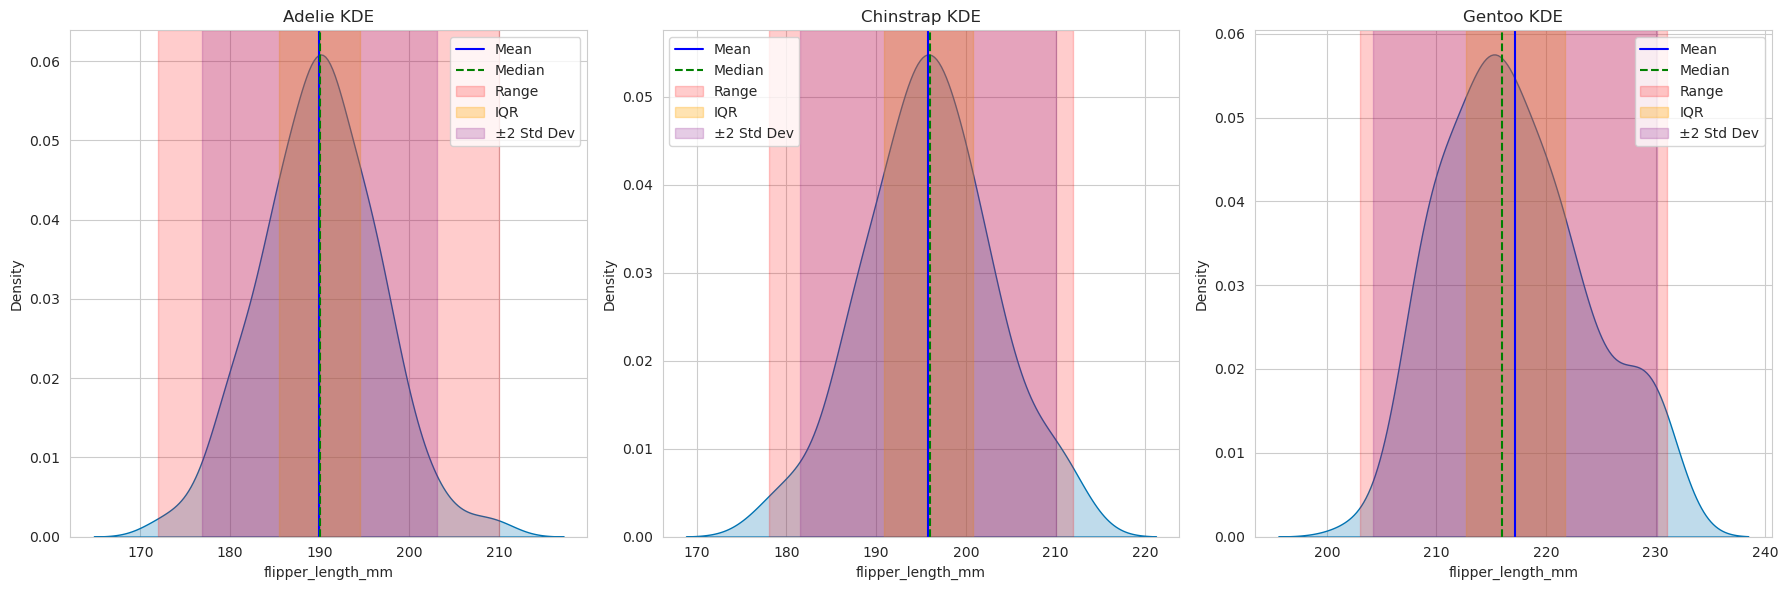

In [9]:
#Q2
#link：https://chatgpt.com/share/66f6fe30-29e8-8009-99ba-ea2ba31b8554
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Remove missing data if any
df = df.dropna(subset=['flipper_length_mm', 'species'])

# Define a function to compute stats for each species
def compute_stats(data, column):
    stats = {}
    stats['mean'] = data[column].mean()
    stats['median'] = data[column].median()
    stats['min'] = data[column].min()
    stats['max'] = data[column].max()
    stats['iqr'] = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    stats['std'] = data[column].std()
    stats['lower_2std'] = stats['mean'] - 2 * stats['std']
    stats['upper_2std'] = stats['mean'] + 2 * stats['std']
    return stats

# Compute statistics for each species
species_stats = {}
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    species_stats[species] = compute_stats(species_data, 'flipper_length_mm')
# Create a figure with three subplots organized in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for each species
for i, species in enumerate(df['species'].unique()):
    species_data = df[df['species'] == species]
    stats = species_stats[species]
    
    # Plot KDE
    sns.kdeplot(species_data['flipper_length_mm'], ax=axes[i], fill=True)
    axes[i].set_title(f"{species} KDE")
    
    # Add vertical lines for mean and median
    axes[i].axvline(stats['mean'], color='blue', linestyle='-', label='Mean')
    axes[i].axvline(stats['median'], color='green', linestyle='--', label='Median')
    
    # Add shaded regions for range, IQR, and 2 standard deviations
    axes[i].axvspan(stats['min'], stats['max'], color='red', alpha=0.2, label='Range')
    axes[i].axvspan(stats['mean'] - stats['iqr']/2, stats['mean'] + stats['iqr']/2, color='orange', alpha=0.3, label='IQR')
    axes[i].axvspan(stats['lower_2std'], stats['upper_2std'], color='purple', alpha=0.2, label='±2 Std Dev')

    # Show legend
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


#Q3
#image:https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FHistograms-20-bins-and-2D-Kernel-Density-Estimation-of-Log-Unscaled-Total-Degree_fig4_335288186&psig=AOvVaw14hY1-pQeDdS3Xe5QQb9Hj&ust=1727550003682000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCOi1ob3n44gDFQAAAAAdAAAAABAE
#ChatGPT:https://chatgpt.com/share/66f7053c-1bd0-8009-b2ed-3f454fefec37

Histogram (left panel):  
 A histogram divides the data into intervals and shows how many observations are in each interval. the x-axis shows the metric and the y-axis shows the number.  Each metric has two overlapping histograms. The histograms show the relative distribution of the different centrality measures (

Two-dimensional kernel density estimate (KDE, right-hand panel):  
The KDE is used to estimate the probability density of a random variable. A two-dimensional KDE plot visualizes the joint distribution of two variables, providing a smooth estimate of the region in which the data points are concentrated.  The 2D KDE plot emphasizes the distribution of most data points.

Histograms:
Advantages: Simple and easy to understand, it shows how many observations are in a given range.  

Disadvantages: May hide important details or make the data wrong.  

KDE: Pros: Provides a smooth, continuous estimate of the distribution, which usually highlights data patterns better than a histogram. It avoids the problem of choosing interval widths. Ideal for displaying multi-peaked distributions.
Disadvantages: Requires values with large gaps, more computationally intensive.

I prefer to use histograms, I like quick and concise summaries or need to explain data to an audience unfamiliar with KDE, I will use histograms as they are more intuitive.

Chat GPT
Let's enrich the content and add some depth to your description by focusing on key concepts, elaborating on technical aspects, and improving the overall structure. Here's a revised and more comprehensive version of your comparison:

---

### Histogram (Left Panel)
A histogram is a basic yet powerful tool for visualizing the frequency distribution of data. It works by dividing the data into intervals, called bins, and counting how many observations fall into each bin. In this case, each metric has two overlapping histograms that allow us to compare different centrality measures. 

- **X-axis**: Represents the metric or data variable of interest.
- **Y-axis**: Shows the count of observations within each bin.

Histograms provide a clear and concise way to visualize the distribution of a single variable or to compare distributions between two categories. Overlapping histograms are particularly useful for visualizing the similarities and differences between the two distributions.

### Two-Dimensional Kernel Density Estimate (KDE, Right Panel)
KDE is a more advanced technique used to estimate the probability density function of a continuous variable. Instead of dividing the data into bins like a histogram, KDE computes a smooth, continuous curve that represents the density of data points in space. In the two-dimensional case, the KDE helps visualize the **joint distribution** of two variables. The result is typically a contour or heatmap that highlights areas where data points are most concentrated.

- **X and Y Axes**: Represent two variables whose joint distribution is visualized.
- **Contours/Heatmap**: Show regions of high or low density, emphasizing where data points cluster.

The 2D KDE plot is particularly useful for identifying patterns, such as whether the relationship between two variables is linear, non-linear, or multi-modal (with multiple peaks).

---

### Pros and Cons

**Histograms**:
- **Advantages**:
  - **Simplicity**: Histograms are easy to interpret and visually straightforward, making them ideal for presenting data to audiences with varied levels of statistical understanding.
  - **Quick Overview**: They provide a quick, concise summary of how data is distributed across different ranges, making them suitable for initial data exploration.
  - **Categorical Comparison**: In the case of overlapping histograms, it's easy to compare two distributions side by side.
  
- **Disadvantages**:
  - **Loss of Detail**: By aggregating data into bins, histograms may hide finer details of the distribution. If the bin width is too wide, important features (like peaks or gaps) may be lost.
  - **Bin Size Sensitivity**: The choice of bin size greatly affects the visual outcome. Too many bins may create noise, while too few bins may oversimplify the distribution.
  - **Harder for Multi-modal Data**: For complex, multi-modal distributions (those with more than one peak), histograms can make it harder to discern the true structure of the data.

**Two-Dimensional Kernel Density Estimate (KDE)**:
- **Advantages**:
  - **Smooth and Continuous Representation**: KDE provides a smooth estimate of the data distribution, which avoids the problem of arbitrary bin sizes and shows transitions between data points more clearly.
  - **Captures Complexity**: KDE is excellent for visualizing multi-modal distributions or where there are subtle variations in density. It’s particularly useful when the dataset is large, and fine-grained insights are needed.
  - **Flexibility**: KDE can adapt to the structure of the data, making it easier to identify clusters, patterns, and relationships between variables in a 2D space.

- **Disadvantages**:
  - **More Complex**: While KDE provides more detail, it can be harder to explain and interpret, especially for audiences unfamiliar with probability density estimation.
  - **Computationally Intensive**: For large datasets, calculating the KDE can be more time-consuming than generating a histogram.
  - **Requires Continuity**: KDE works best with continuous data and might struggle with datasets that have large gaps or sparse data in some regions.

---

### Preference and Rationale
In situations where I need to convey quick insights or present to an audience that isn't familiar with advanced statistical methods, **I prefer histograms**. Their simplicity and clarity make them ideal for explaining basic patterns in the data without overwhelming the audience. They offer a direct and intuitive way to display distributions, making them particularly useful in presentations or reports where speed and accessibility are key.

However, if I were dealing with a more complex dataset—especially one with multiple peaks or a need for detailed analysis—I'd consider using KDE. While histograms serve well for simple tasks, **KDE is a more sophisticated tool** for uncovering underlying patterns that might not be immediately visible with a histogram.

---

**Summary**: The choice between histograms and KDE depends on the context. If you're aiming for simplicity and ease of interpretation, histograms are an excellent choice. On the other hand, if your goal is to uncover complex patterns or work with multi-dimensional data, KDE can provide deeper insights, though it requires more computational power and expertise to interpret.

---

How does this enriched version fit with your perspective? Let me know if there’s anything you’d like to further expand on!


In [12]:
#Q4
# I did a similar one.
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Generating random data
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)  # Uniform distribution
data2 = stats.norm.rvs(5, 1.5, size=n)    # Normal distribution
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]  # Mixture of two normals
data4 = stats.norm.rvs(6, 0.5, size=n)    # Normal distribution

# Creating subplots for the histograms
fig = make_subplots(rows=1, cols=4)

# Adding histograms to the figure
fig.add_trace(go.Histogram(x=data1, name='Dist A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='Dist B', nbinsx=20, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='Dist C', nbinsx=40, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='Dist D', nbinsx=25, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

# Updating layout
fig.update_layout(height=300, width=750, title_text="Histograms of Different Distributions")

# Adding axis labels
fig.update_xaxes(title_text="Dist A", row=1, col=1)
fig.update_xaxes(title_text="Dist B", row=1, col=2)
fig.update_xaxes(title_text="Dist C", row=1, col=3)
fig.update_xaxes(title_text="Dist D", row=1, col=4)

# Setting a fixed range for x-axis across all histograms
fig.update_xaxes(range=[-0.5, 10.5])

# Defining bin ranges for all histograms
for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# Display the plot
fig.show()



In [13]:
#Q4
#chat GPT:https://chatgpt.com/share/66f70885-e838-8009-a6f1-ae55d8311131
analyze this code:

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#Datasets with similar means and similar variances:
Data1 and Data3 have nearly identical means (~5.00) and their variances are also similar (8.37 and 9.12).
Datasets with similar means but quite different variances:
Data1 and Data2 have very similar means (~5.00), but their variances differ significantly. Data1 has a variance of 8.37, while Data2 has a much smaller variance of 2.24.
Datasets with similar variances but quite different means:
Data2 and Data4 have relatively small variances (2.24 for Data2 and 0.25 for Data4), but their means differ. Data2 has a mean of ~4.98, while Data4 has a mean of ~5.99.
Datasets with quite different means and quite different variances:
Data1 and Data4 have both different means (~5.00 for Data1 and ~5.99 for Data4) and different variances (8.37 for Data1 and 0.25 for Data4).

       fat_content_clean  calcium_content_clean
count         248.000000              25.000000
mean           37.426411             664.040000
std            13.512234             909.001351
min             0.000000              26.000000
25%            28.000000             316.000000
50%            40.000000             488.000000
75%            45.250000             740.000000
max            75.000000            4768.000000


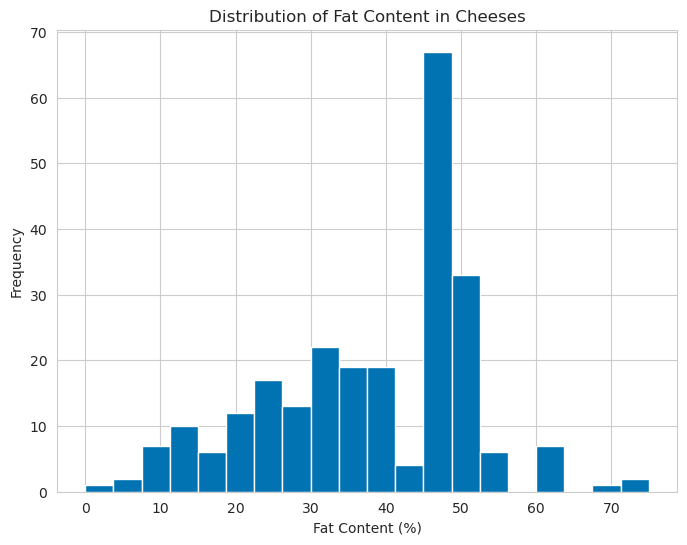

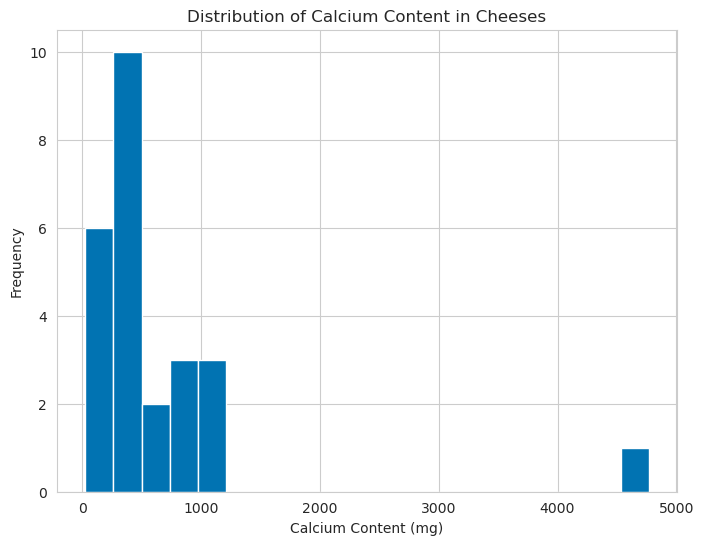

In [16]:
#Q6
#Link:https://chatgpt.com/share/66f70eda-1224-8009-aceb-43deea820f65

import pandas as pd
import matplotlib.pyplot as plt

# Load the cheese dataset
df_cheese = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv")

# Step 1: Cleaning the fat_content and calcium_content columns by extracting numeric values from the ranges and percentages

# Convert fat content (remove percentage and ranges)
df_cheese['fat_content_clean'] = df_cheese['fat_content'].str.extract(r'(\d+\.?\d*)').astype(float)

# Convert calcium content (remove any text or non-numeric symbols)
df_cheese['calcium_content_clean'] = df_cheese['calcium_content'].str.extract(r'(\d+\.?\d*)').astype(float)

# Step 2: Summary Statistics
summary_stats_cheese_clean = df_cheese[['fat_content_clean', 'calcium_content_clean']].describe()

# Display cleaned summary statistics
print(summary_stats_cheese_clean)

# Step 3: Visualizations

# Fat content histogram
plt.figure(figsize=(8, 6))
df_cheese['fat_content_clean'].dropna().hist(bins=20)
plt.title('Distribution of Fat Content in Cheeses')
plt.xlabel('Fat Content (%)')
plt.ylabel('Frequency')
plt.show()

# Calcium content histogram
plt.figure(figsize=(8, 6))
df_cheese['calcium_content_clean'].dropna().hist(bins=20)
plt.title('Distribution of Calcium Content in Cheeses')
plt.xlabel('Calcium Content (mg)')
plt.ylabel('Frequency')
plt.show()


       fat_content_clean  calcium_content_clean
count         248.000000              25.000000
mean           37.426411             664.040000
std            13.512234             909.001351
min             0.000000              26.000000
25%            28.000000             316.000000
50%            40.000000             488.000000
75%            45.250000             740.000000
max            75.000000            4768.000000


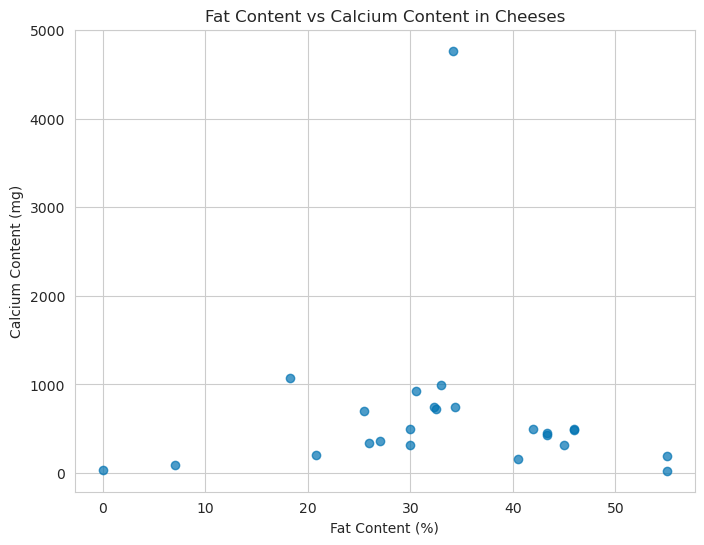

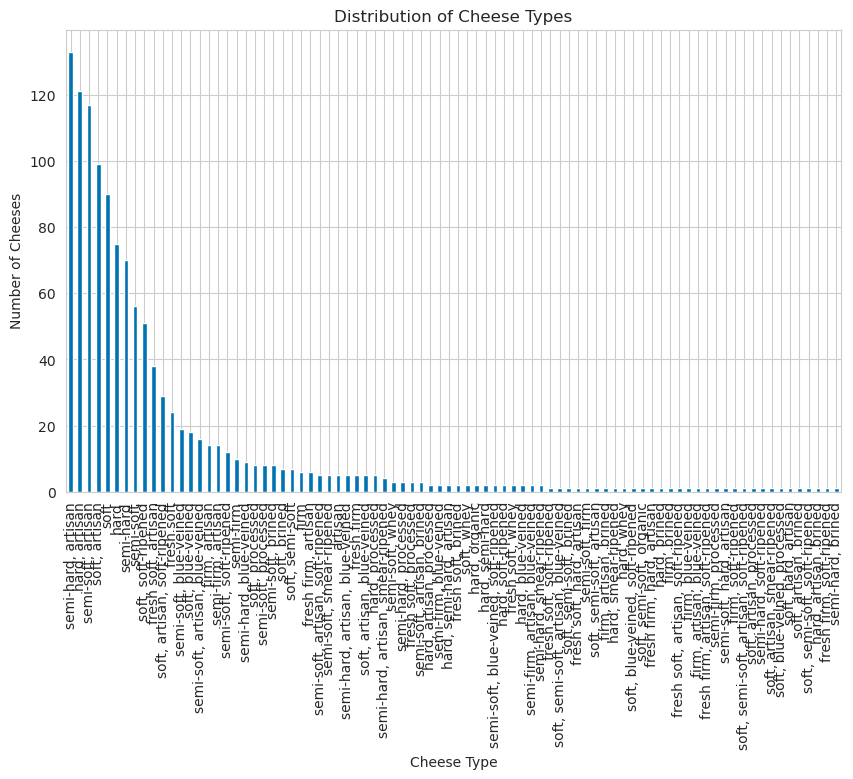

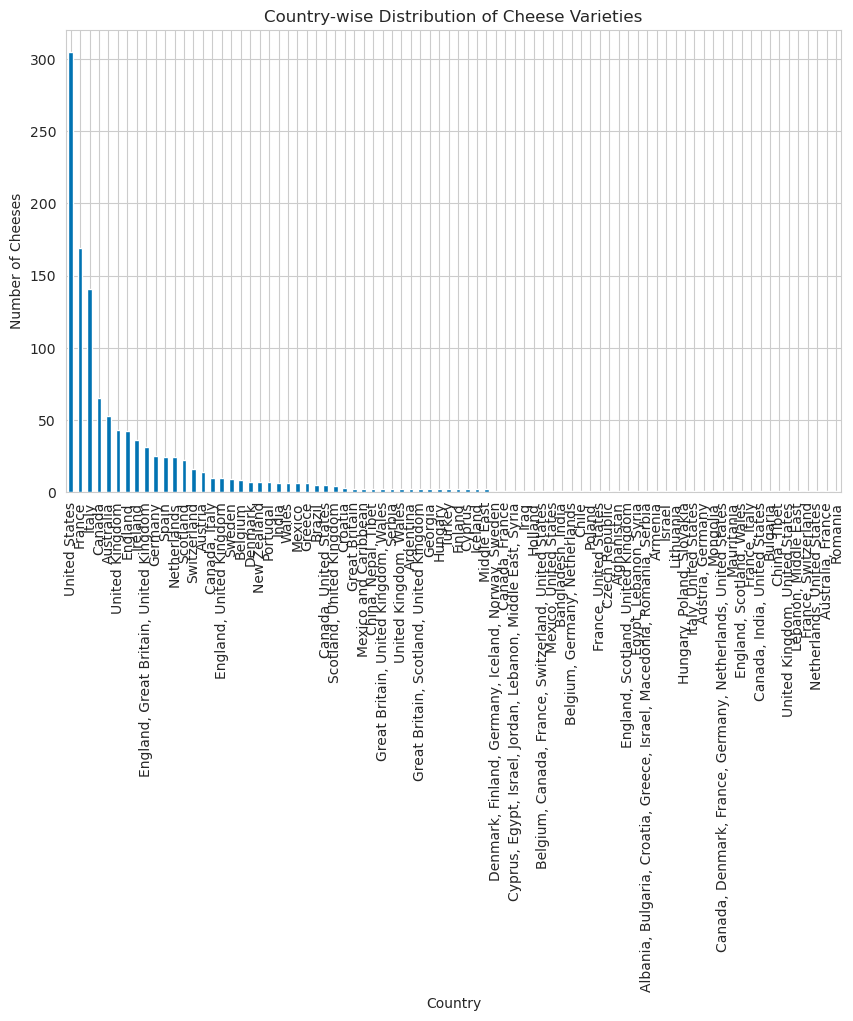

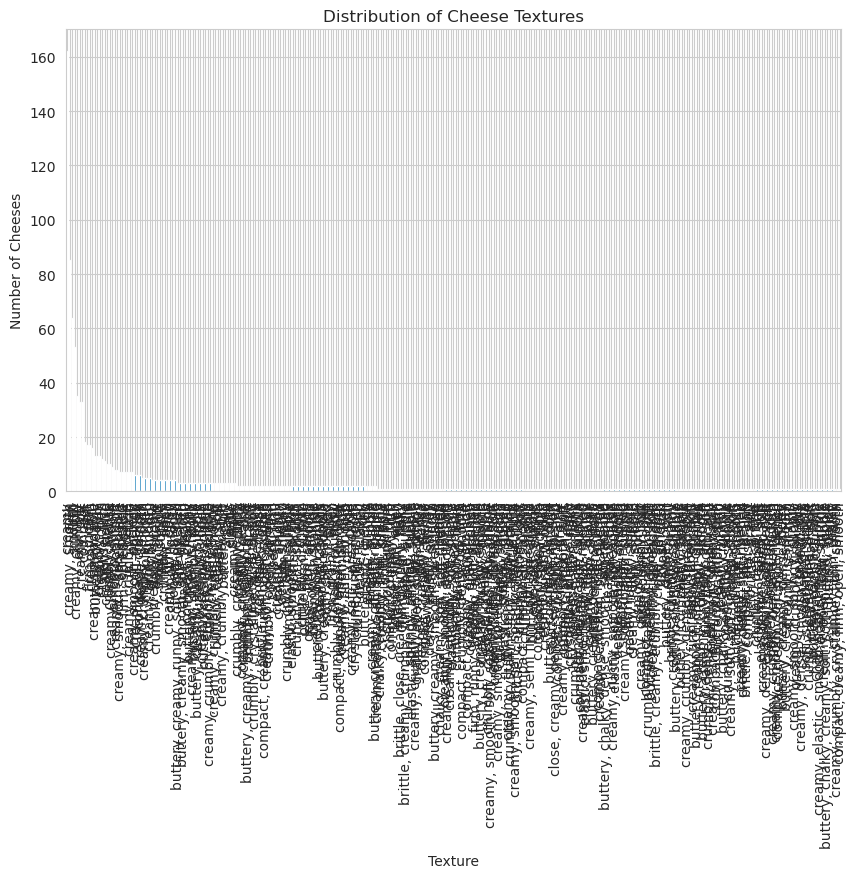

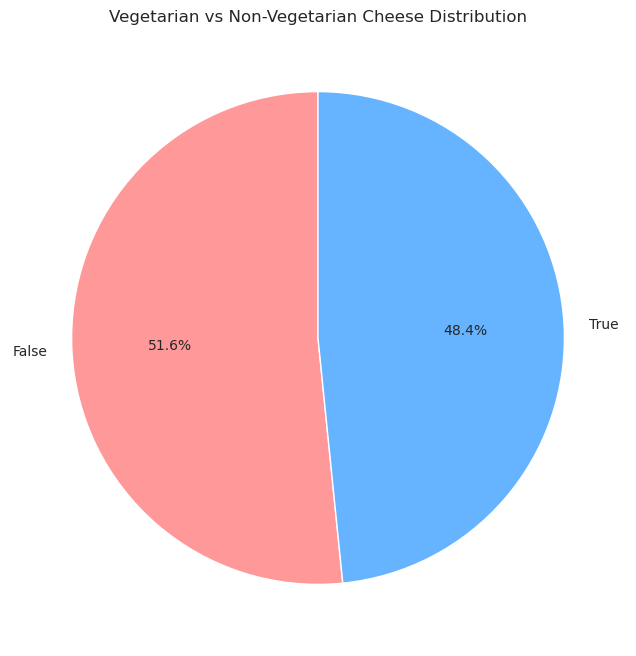

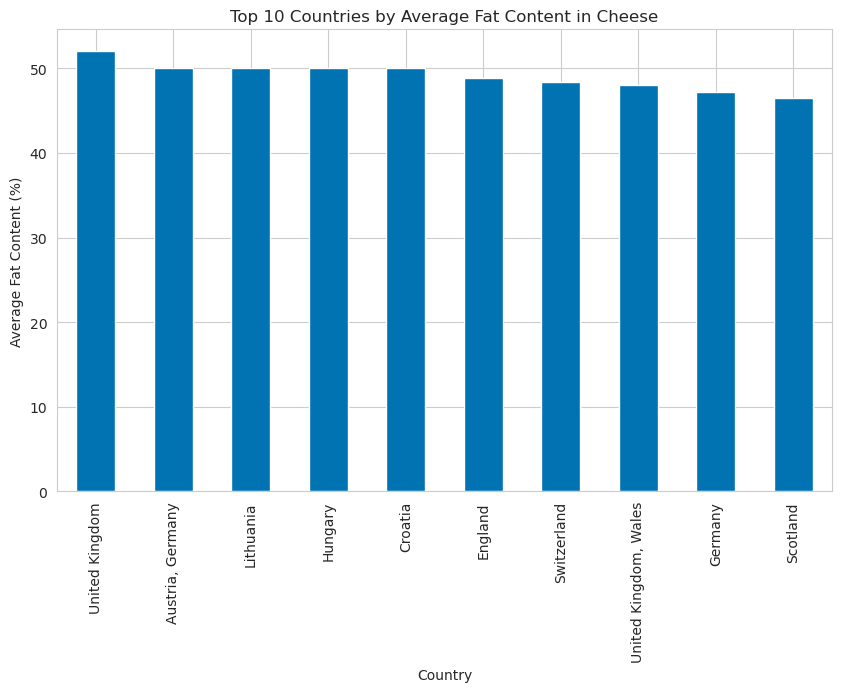

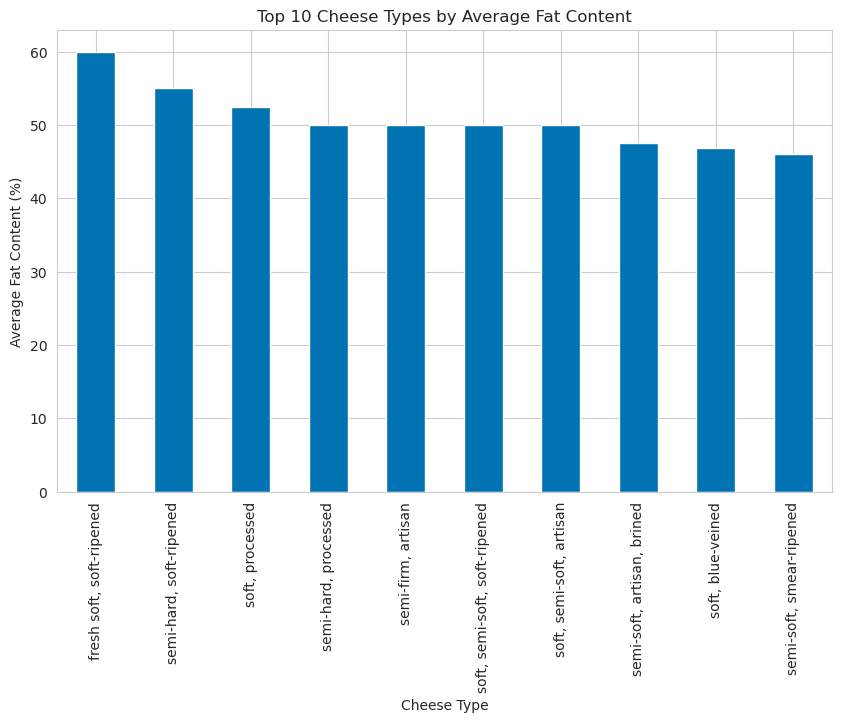

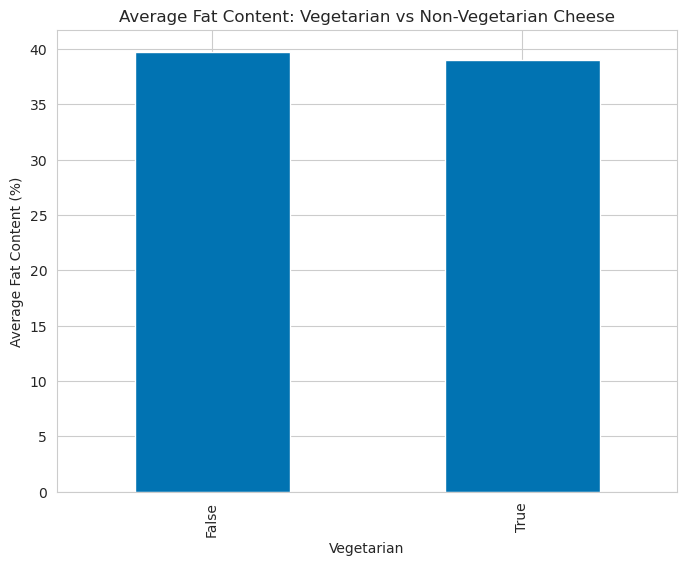

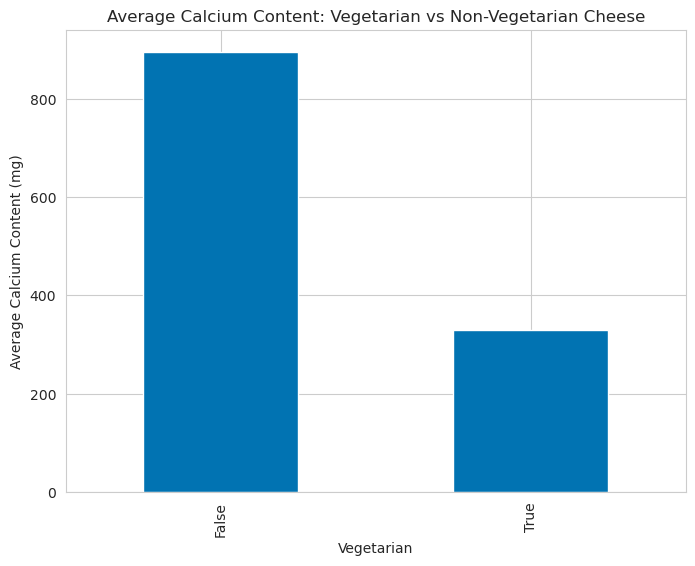

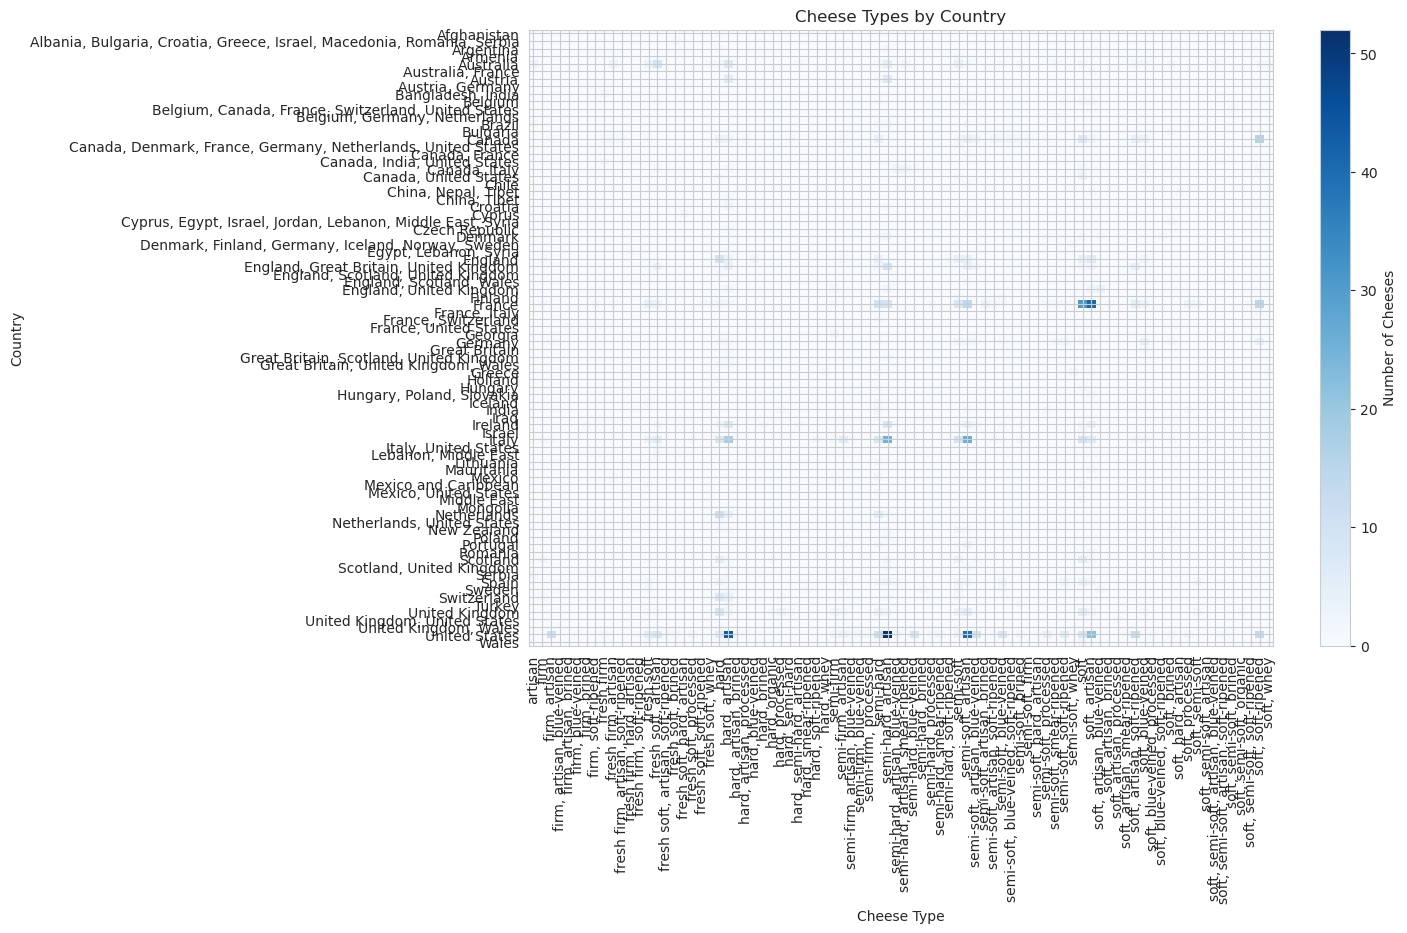

In [17]:
#Q6

import pandas as pd
import matplotlib.pyplot as plt

# Load the cheese dataset
df_cheese = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv")

# Step 1: Cleaning the fat_content and calcium_content columns by extracting numeric values from the ranges and percentages

# Convert fat content (remove percentage and ranges)
df_cheese['fat_content_clean'] = df_cheese['fat_content'].str.extract(r'(\d+\.?\d*)').astype(float)

# Convert calcium content (remove any text or non-numeric symbols)
df_cheese['calcium_content_clean'] = df_cheese['calcium_content'].str.extract(r'(\d+\.?\d*)').astype(float)

# Step 2: Summary Statistics
summary_stats_cheese_clean = df_cheese[['fat_content_clean', 'calcium_content_clean']].describe()

# Display cleaned summary statistics
print(summary_stats_cheese_clean)

# Step 3: Visualizations

# Fat content vs calcium content scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cheese['fat_content_clean'], df_cheese['calcium_content_clean'], alpha=0.7)
plt.title('Fat Content vs Calcium Content in Cheeses')
plt.xlabel('Fat Content (%)')
plt.ylabel('Calcium Content (mg)')
plt.show()

# Distribution of cheese types
plt.figure(figsize=(10, 6))
df_cheese['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Cheese Types')
plt.xlabel('Cheese Type')
plt.ylabel('Number of Cheeses')
plt.show()

# Country-wise distribution of cheese varieties
plt.figure(figsize=(10, 6))
df_cheese['country'].value_counts().plot(kind='bar')
plt.title('Country-wise Distribution of Cheese Varieties')
plt.xlabel('Country')
plt.ylabel('Number of Cheeses')
plt.show()

# Distribution of cheese textures
plt.figure(figsize=(10, 6))
df_cheese['texture'].value_counts().plot(kind='bar')
plt.title('Distribution of Cheese Textures')
plt.xlabel('Texture')
plt.ylabel('Number of Cheeses')
plt.show()

# Vegetarian vs non-vegetarian cheese pie chart
plt.figure(figsize=(8, 8))
df_cheese['vegetarian'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Vegetarian vs Non-Vegetarian Cheese Distribution')
plt.ylabel('')  # Remove y-label for cleaner presentation
plt.show()

# Group by country and calculate the mean fat content
country_fat = df_cheese.groupby('country')['fat_content_clean'].mean().dropna().sort_values(ascending=False)

# Plot the top 10 countries by fat content
plt.figure(figsize=(10, 6))
country_fat.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Average Fat Content in Cheese')
plt.xlabel('Country')
plt.ylabel('Average Fat Content (%)')
plt.show()

# Group by type of cheese and calculate the mean fat content
type_fat = df_cheese.groupby('type')['fat_content_clean'].mean().dropna().sort_values(ascending=False)

# Plot the top 10 cheese types by fat content
plt.figure(figsize=(10, 6))
type_fat.head(10).plot(kind='bar')
plt.title('Top 10 Cheese Types by Average Fat Content')
plt.xlabel('Cheese Type')
plt.ylabel('Average Fat Content (%)')
plt.show()

# Compare fat and calcium content between vegetarian and non-vegetarian cheeses
veg_nonveg_fat = df_cheese.groupby('vegetarian')['fat_content_clean'].mean().dropna()
veg_nonveg_calcium = df_cheese.groupby('vegetarian')['calcium_content_clean'].mean().dropna()

# Plot the comparison for fat content
plt.figure(figsize=(8, 6))
veg_nonveg_fat.plot(kind='bar')
plt.title('Average Fat Content: Vegetarian vs Non-Vegetarian Cheese')
plt.xlabel('Vegetarian')
plt.ylabel('Average Fat Content (%)')
plt.show()

# Plot the comparison for calcium content
plt.figure(figsize=(8, 6))
veg_nonveg_calcium.plot(kind='bar')
plt.title('Average Calcium Content: Vegetarian vs Non-Vegetarian Cheese')
plt.xlabel('Vegetarian')
plt.ylabel('Average Calcium Content (mg)')
plt.show()

# Cheese Types by Country (Heatmap)
country_type = df_cheese.groupby(['country', 'type']).size().unstack().fillna(0)

# Plot the heatmap of cheese types by country
plt.figure(figsize=(12, 8))
plt.imshow(country_type, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Cheeses')
plt.title('Cheese Types by Country')
plt.xlabel('Cheese Type')
plt.ylabel('Country')
plt.xticks(range(len(country_type.columns)), country_type.columns, rotation=90)
plt.yticks(range(len(country_type.index)), country_type.index)
plt.show()
